# Lab 1: Simulating Quantum Circuits with QISKit
* Author: B08901049 Yuan-Chia Chang
* Instructor: Professor Hao-Chung Cheng
* TA: Chia-Yi Chou
* Created: 9/29/2021(Wed)
* Last edited: 10/10/2021(Sun)
* Contact: b08901049@ntu.edu.tw
* Collaborator: B08901002 Chen-Han Lin, B08901209 Yu-Hsiang Lin

## Import some packages

In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi
import random

## Some Utilities

In [2]:
statevector_simulator = Aer.get_backend('statevector_simulator')
qasm_simulator = Aer.get_backend('qasm_simulator')

## Q1

### 1(a)(b)(c)(d)
skip

### 1(e)

In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.x(q[0]) # substitute x by y, z for making different gates 
circuit.draw()

┌───┐
q0_0: ┤ X ├
      └───┘
q0_1: ─────
           
c0: 2/═════

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


C:\Users\USER\anaconda3\envs\IBMQ\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


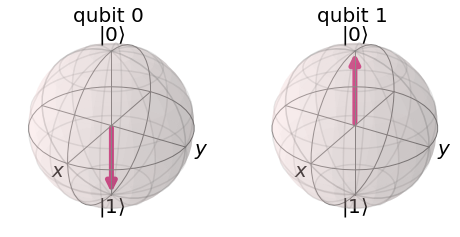

In [4]:
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

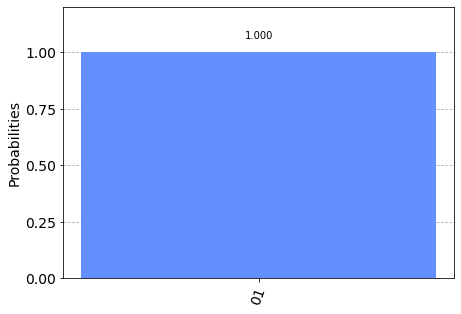

In [5]:
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### 1(f)

In [6]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)
"""
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
"""


[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


'\ncircuit.measure(q,c)\njob = execute(circuit, qasm_simulator, shots = 1024)\nresult = job.result()\ncounts = result.get_counts()\nplot_histogram(counts)\n'

### 1(g)

[0.70710678+0.j         0.        -0.70710678j]


C:\Users\USER\anaconda3\envs\IBMQ\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


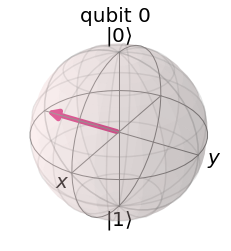

In [7]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.rx(pi/2, q[0]) # substitute rx by ry, rz for making different gates 
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

### 1(h) 

In [8]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0]) #for preparing in Hadamard bases[1]
circuit.ry(2 * np.arctan(np.sqrt(2)), q[0])
circuit.rx(random.random(), q[0]) #the angle of rotation-X gate is independent of the measuring result
#the above is the state for 2/3 probability of getting |-> state
circuit.h(q[0]) #for measuring in Hadamard bases[1]
circuit.measure(q,c)
circuit.draw()

┌───┐┌────────────┐┌─────────────┐┌───┐┌─┐
q26_0: ┤ H ├┤ Ry(1.9106) ├┤ Rx(0.61157) ├┤ H ├┤M├
       └───┘└────────────┘└─────────────┘└───┘└╥┘
 c3: 1/════════════════════════════════════════╩═
                                               0

## Q2

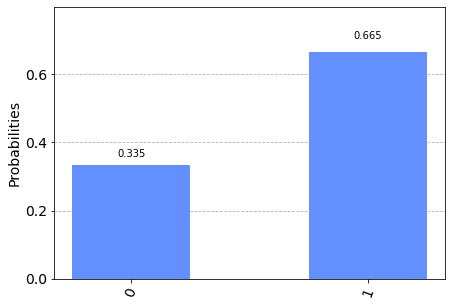

In [9]:
job = execute(circuit, qasm_simulator, shots = 102400)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### 2(a)

In [10]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.h(q[1])
"""
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
"""


'\ncircuit.measure(q,c)\njob = execute(circuit, qasm_simulator, shots = 1024)\nresult = job.result()\ncounts = result.get_counts()\nplot_histogram(counts)\n'

### 2(b)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


C:\Users\USER\anaconda3\envs\IBMQ\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


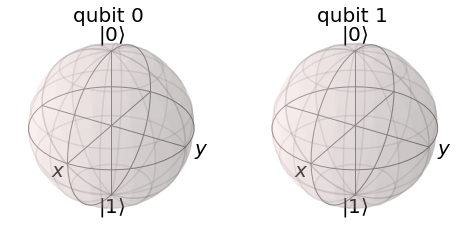

In [11]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.cx(q[0], q[1]) #[2]

job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)
# 1.to see the documentation
# 2. to generate product state, and entangled state. 
#circuit.measure(q,c)
#job = execute(circuit, qasm_simulator, shots = 1024)
#result = job.result()
#counts = result.get_counts()
#plot_histogram(counts)


### 2(c)

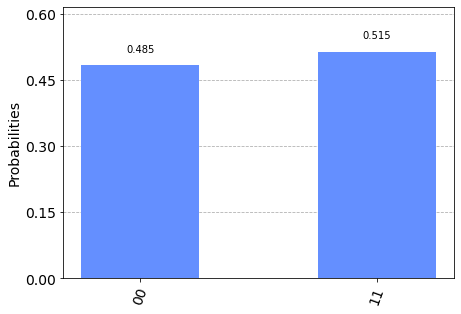

In [12]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.h(q[0])
circuit.h(q[1])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### 2(d) [3][4]

#### Phi -

In [13]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.x(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


#### Psi +

In [14]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.z(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[ 0.70710678+0.j -0.        +0.j  0.        +0.j -0.70710678+0.j]


#### Psi -

In [15]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.z(q[0])
circuit.x(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[ 4.32978028e-17+0.j  7.07106781e-01+0.j -7.07106781e-01+0.j
  4.32978028e-17+0.j]


### 2(e)

In [16]:
# 1. prepare the state which will give the 10 higher probability than 01
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.ry(pi/4, q[0])
circuit.cx(q[0], q[1])
circuit.x(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[0.        +0.j 0.38268343+0.j 0.92387953+0.j 0.        +0.j]


In [17]:
# 2. use swap gate
circuit.swap(q[0], q[1])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[0.        +0.j 0.92387953+0.j 0.38268343+0.j 0.        +0.j]


In [18]:
# 1. prepare the state which will give the 10 higher probability than 01
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.ry(pi/4, q[0])
circuit.cx(q[0], q[1])
circuit.x(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[0.        +0.j 0.38268343+0.j 0.92387953+0.j 0.        +0.j]


In [19]:
# 2. use three CNOT gate to replicate SWAP gate
circuit.cx(q[1],q[0])
circuit.cx(q[0],q[1])
circuit.cx(q[1],q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[0.        +0.j 0.92387953+0.j 0.38268343+0.j 0.        +0.j]


## Q3

### 3(a)

#### Three measurements of the first qubit state

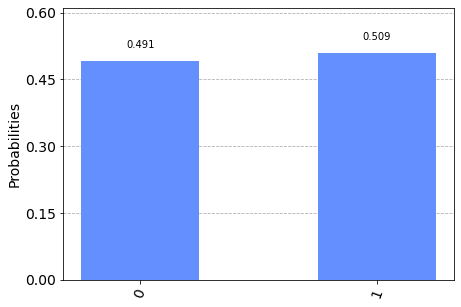

In [20]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.x(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

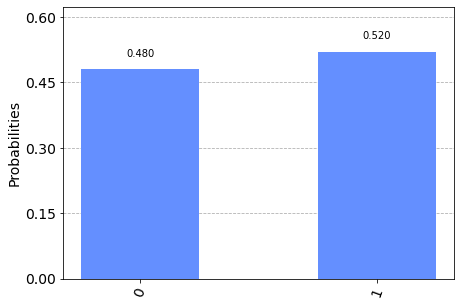

In [21]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.x(q[0])
circuit.sdg(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

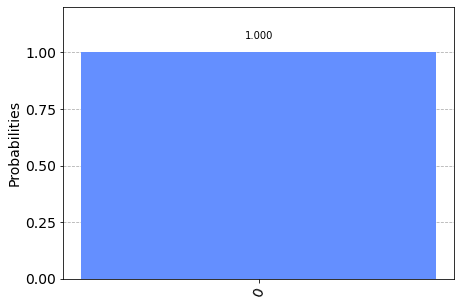

In [22]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.x(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

#### Three measurements of the second qubit state

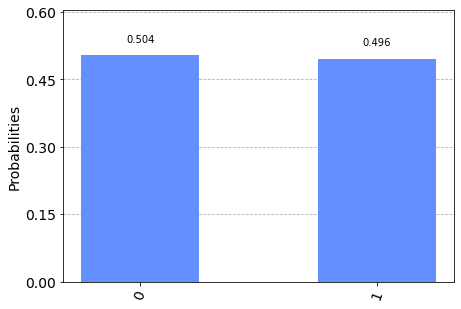

In [23]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.y(q[0])
circuit.z(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

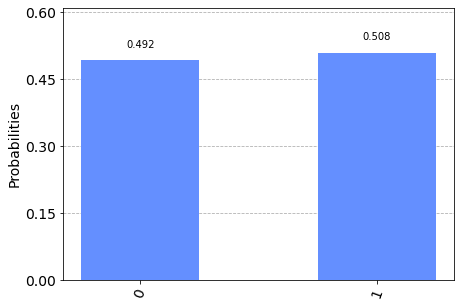

In [24]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.y(q[0])
circuit.z(q[0])
circuit.sdg(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

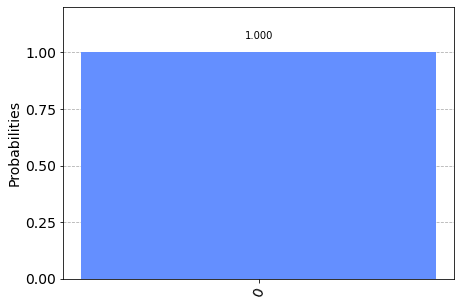

In [25]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.y(q[0])
circuit.z(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### 3(b)[4]

#### Three measurements of the first qubit state

In [26]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.z(q[0])
circuit.draw()

┌───┐┌───┐
q244_0: ┤ X ├┤ Z ├
        └───┘└───┘
 c18: 1/══════════

In [27]:
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[ 6.123234e-17+1.49975978e-32j -1.000000e+00-3.67394040e-16j]


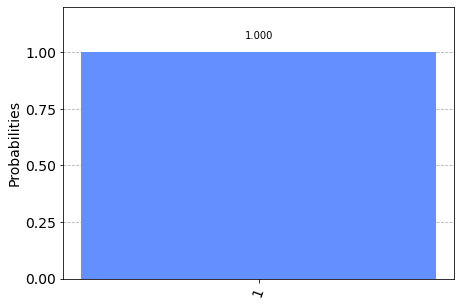

In [28]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.z(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

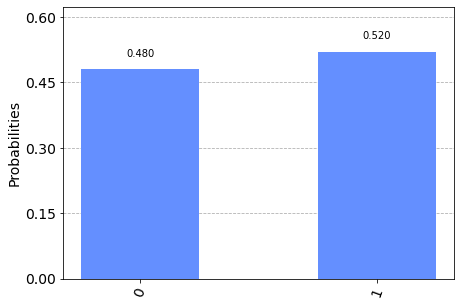

In [29]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.z(q[0])
circuit.sdg(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

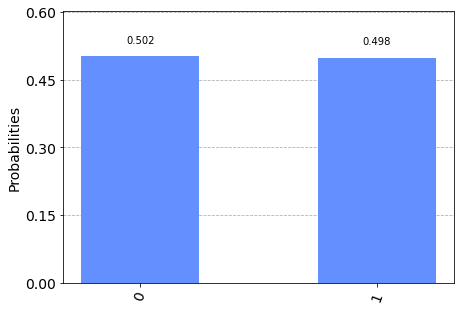

In [30]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.z(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

#### Three measurements of the second qubit state

In [31]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.z(q[0])
circuit.x(q[0])
circuit.draw()

┌───┐┌───┐
q291_0: ┤ Z ├┤ X ├
        └───┘└───┘
 c22: 1/══════════

In [32]:
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[6.123234e-17+0.j 1.000000e+00+0.j]


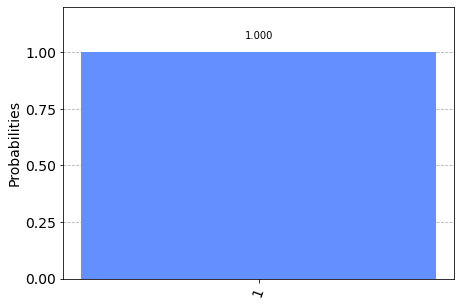

In [33]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.z(q[0])
circuit.x(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

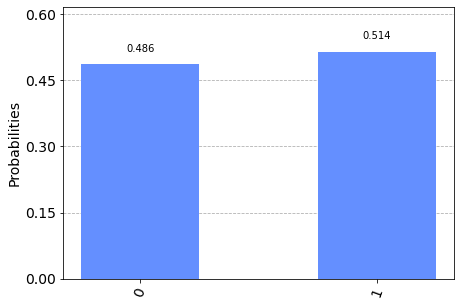

In [34]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.z(q[0])
circuit.x(q[0])
circuit.sdg(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

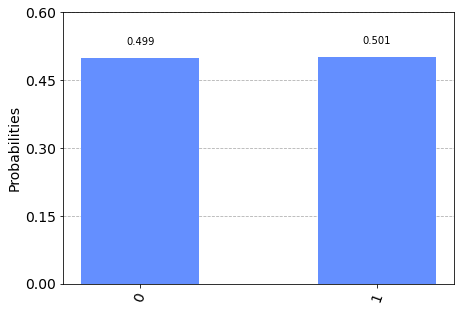

In [35]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.z(q[0])
circuit.x(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### 3(c)

#### Three measurements of the first qubit state

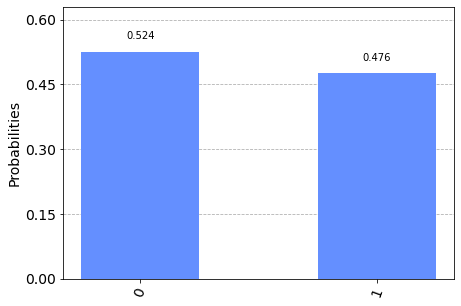

In [36]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

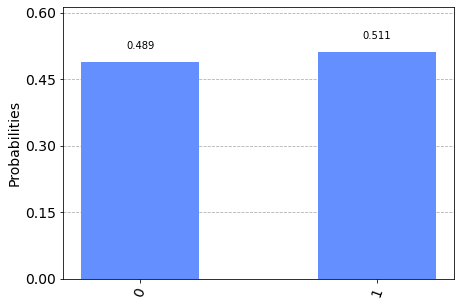

In [37]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.h(q[0])
circuit.sdg(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

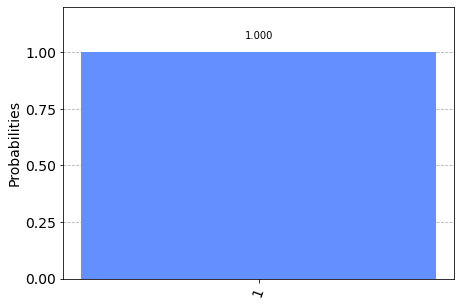

In [38]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.h(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

#### Three measurements of the second qubit state

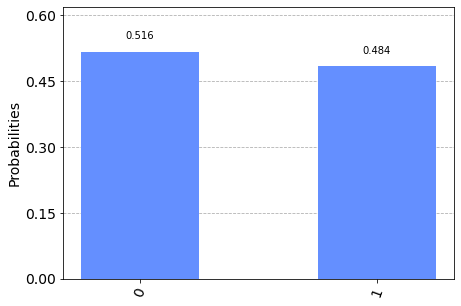

In [39]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

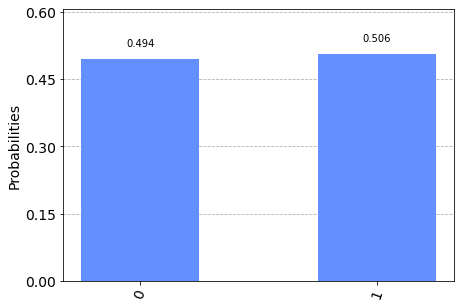

In [40]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.sdg(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

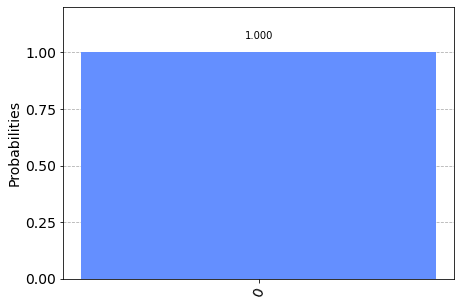

In [41]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Q4

In [59]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
circuit = QuantumCircuit(q,c)
q1_state = np.array([1/np.sqrt(3), np.sqrt(2)/np.sqrt(3)])
q2_state = np.array([-np.sqrt(2)/np.sqrt(3), np.sqrt(1)/np.sqrt(3)])
print("theorical probability of 0 is: ",print(0.5 * (np.cross(q1_state,q2_state) ** 2 )))
circuit.initialize(q1_state, 0)
circuit.initialize(q2_state, 1)
circuit.draw()
circuit.h(q[2])
circuit.cswap(q[2],q[0],q[1])
circuit.h(q[2])
circuit.x(q[2])
circuit.measure(2,2)
circuit.draw()

0.5000000000000002
theorical probability of 0 is:  None


┌────────────────────────────┐                
q627_0: ─┤ Initialize(0.57735,0.8165) ├─X──────────────
        ┌┴────────────────────────────┤ │              
q627_1: ┤ Initialize(-0.8165,0.57735) ├─X──────────────
        └────────────┬───┬────────────┘ │ ┌───┐┌───┐┌─┐
q627_2: ─────────────┤ H ├──────────────■─┤ H ├┤ X ├┤M├
                     └───┘                └───┘└───┘└╥┘
 c39: 3/═════════════════════════════════════════════╩═
                                                     2

In [60]:
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[ 9.29858629e-19+0.j -7.07106781e-01+0.j  7.07106781e-01+0.j
 -9.29858629e-19+0.j -0.00000000e+00+0.j -0.00000000e+00+0.j
 -0.00000000e+00+0.j  0.00000000e+00+0.j]


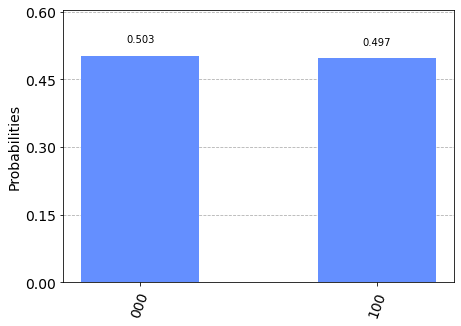

In [61]:
job = execute(circuit, qasm_simulator, shots = 102400)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Q5

### 5(a)

In [45]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
circuit = QuantumCircuit(q,c)
for i in range(5):
    circuit.h(q[i])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots=20, memory=True) #For getting the information of every shots[5]
result = job.result()
counts = result.get_memory()
random_list = []
for i in counts:
    random_list.append(int(i,2))
print(random_list)

[26, 14, 26, 31, 24, 20, 16, 28, 24, 31, 15, 11, 12, 26, 0, 2, 24, 8, 10, 7]


### 5(b)[6]

In [46]:
api_token = "1a1095eb06da72eb4ec3f07a7c583eb84d89a9d96e3cec78db81374e92af3c3f3fa5ecaaf5821bc5c166c41d9615fd2ac7b72615f3e8a77b15532ab10395a66f"
IBMQ.save_account(api_token)
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q', group = 'open',project = 'main')
qcomp = provider.get_backend('ibmq_santiago')

configrc.store_credentials:WARNING:2021-10-10 12:02:55,001: Credentials already present. Set overwrite=True to overwrite.


In [47]:
# The program would take more than a minute to execute due to queueing
q = QuantumRegister(5)
c = ClassicalRegister(5)
circuit = QuantumCircuit(q,c)
for i in range(5):
    circuit.h(q[i])
circuit.measure(q,c)
job = execute(circuit, backend = qcomp, shots=20, memory=True) #For getting the information of every shots
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()
counts = result.get_memory()
random_list = []
for i in counts:
    random_list.append(int(i,2))
print(random_list)

Job Status: job has successfully run
[10, 18, 16, 11, 15, 27, 31, 28, 3, 7, 1, 6, 28, 4, 26, 18, 28, 23, 15, 21]


## References

[1] https://quantumcomputing.stackexchange.com/questions/13605/how-to-measure-in-another-basis \
[2] https://qiskit.org/textbook/ch-gates/more-circuit-identities.html \
[3] https://en.wikipedia.org/wiki/Bell_state \
[4] https://en.wikipedia.org/wiki/Quantum_logic_gate \
[5] https://quantumcomputing.stackexchange.com/questions/5308/qiskit-per-shot-result \
[6] https://drive.google.com/file/d/1TMI0jg7aYaMUQQCylUwIZkUN3mtOHa9u/view